# 題目:表情判斷

## 組員介紹:
### 1.108701005 應數一 連浩宇
### 2.108701017 應數一 張克齊

## 專案發想
俗話說的好:女人心，海底針。女生的心情複雜程度實在難以用肉眼辨識，因此我們想藉由CNN深度學習協助我們讀懂他人的心情。

## 專案流程:
### (1).資料蒐集:
主要是在蒐集各大社群的圖片及google圖片作為資料庫。
### (2).資料整理:
後來發 現有FER2013的csv資料可用，所以我們以FER2013的資料來做訓練。
### (3)結論及檢查

## 專案實際排程及分工
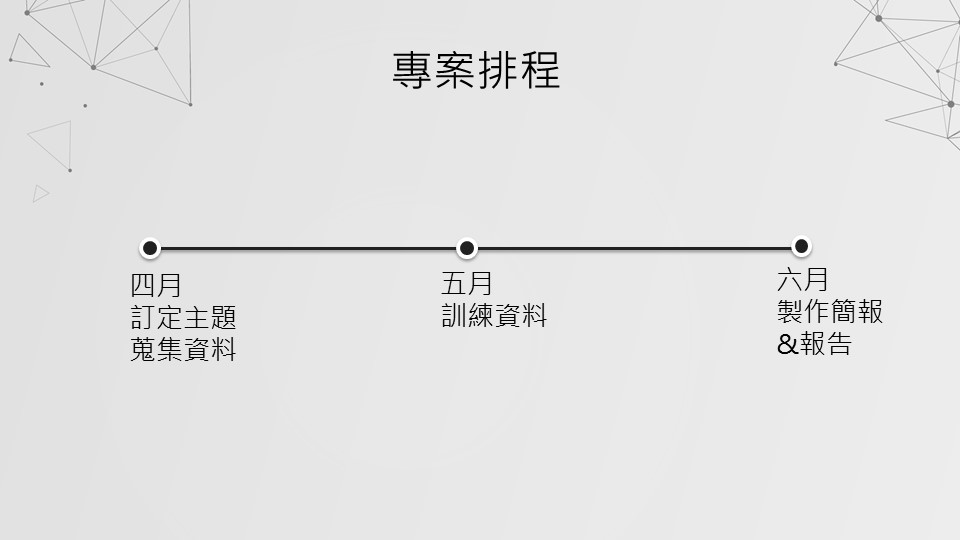

## 資料來源
主要訓練資料都是來自https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


In [2]:
import tensorflow


C:\Users\user\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:5

In [3]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("D:\\Downloads\\31050_39603_compressed_fer2013.csv (1)"))


['fer2013.csv']


In [4]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
filname = "D:\\Downloads\\31050_39603_compressed_fer2013.csv (1)\\fer2013.csv"
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv("D:\\Downloads\\31050_39603_compressed_fer2013.csv (1)\\fer2013.csv",names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [6]:
def getData(filname):
    # 圖像皆為 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [7]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)


7


In [8]:
#reshape成conv2d所需形式
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [9]:
# 訓練
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)


In [10]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [11]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    
    return model
model=my_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
______________________________________

In [12]:
path_model='model_filter.h5' 
K.tensorflow_backend.clear_session() 
model=my_model() 
K.set_value(model.optimizer.lr,1e-3) 
# fit 
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )


Train on 32298 samples, validate on 3589 samples
Epoch 1/20
32298/32298 [==============================] - 732s 23ms/step - loss: 1.6809 - accuracy: 0.3433 - val_loss: 1.5174 - val_accuracy: 0.4101
Epoch 2/20
32298/32298 [==============================] - 716s 22ms/step - loss: 1.3185 - accuracy: 0.4989 - val_loss: 1.3792 - val_accuracy: 0.4812
Epoch 3/20
32298/32298 [==============================] - 690s 21ms/step - loss: 1.1279 - accuracy: 0.5764 - val_loss: 1.1677 - val_accuracy: 0.5528
Epoch 4/20
32298/32298 [==============================] - 719s 22ms/step - loss: 1.0044 - accuracy: 0.6247 - val_loss: 1.3721 - val_accuracy: 0.4865
Epoch 5/20
32298/32298 [==============================] - 725s 22ms/step - loss: 0.8729 - accuracy: 0.6761 - val_loss: 1.1204 - val_accuracy: 0.5876
Epoch 6/20
32298/32298 [==============================] - 723s 22ms/step - loss: 0.7255 - accuracy: 0.7333 - val_loss: 1.1642 - val_accuracy: 0.5899
Epoch 7/20
32298/32298 [==============================] 

In [13]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [14]:
#分析
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [15]:
y_pred=model.predict(X_test)

y_test.shape

(3589, 7)

C:\Users\user\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


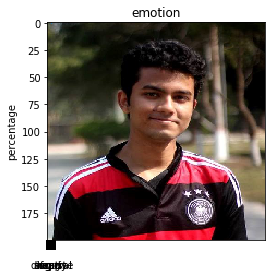

Expression Prediction: happy


In [16]:
#實作1
from skimage import io
img = image.load_img("D:\\Desktop\\photo\\Shawon.jpg", grayscale=True, target_size=(48, 48))
show_img=image.load_img("D:\\Desktop\\photo\\Shawon.jpg", grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

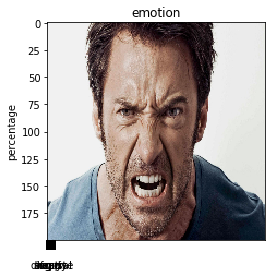

Expression Prediction: angry


In [17]:
#實作2
img = image.load_img("D:\\Desktop\\photo\\mad.jpg", grayscale=True, target_size=(48, 48))
show_img=image.load_img("D:\\Desktop\\photo\\mad.jpg", grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])